In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [4]:
# Load Data
stock = 'SPY'
start = dt.datetime(2005, 1, 1)
end = dt.datetime(2020, 1, 1)
stock_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data['Normalized_Price'] = (stock_data['Close'] - stock_data['Low']) / (stock_data['High'] - stock_data['Low'])

In [6]:
# Calculate regression coefficients
def calculate_regression(stock_data, days):
    reg_coef = []
    for i in range(len(stock_data)):
        if i >= days:
            X = np.arange(days).reshape(-1, 1)
            y = stock_data['Close'].values[i-days:i]
            model = LinearRegression()
            model.fit(X, y)
            reg_coef.append(model.coef_[0])
        else:
            reg_coef.append(0)
    return reg_coef

In [7]:
stock_data['3_day_reg'] = calculate_regression(stock_data, 3)
stock_data['5_day_reg'] = calculate_regression(stock_data, 5)
stock_data['10_day_reg'] = calculate_regression(stock_data, 10)
stock_data['20_day_reg'] = calculate_regression(stock_data, 20)

In [8]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg
Date,,,,,,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,82.842171,55748000,0.215055,0.000000,0.000000,0.000000,0.000000
2005-01-04,120.459999,120.540001,118.440002,118.830002,81.829903,69167600,0.185714,0.000000,0.000000,0.000000,0.000000
2005-01-05,118.739998,119.250000,118.000000,118.010002,81.265244,65667300,0.008002,0.000000,0.000000,0.000000,0.000000
2005-01-06,118.440002,119.150002,118.260002,118.610001,81.678421,47814700,0.393257,-1.145000,0.000000,0.000000,0.000000
2005-01-07,118.970001,119.230003,118.129997,118.440002,81.561333,55847700,0.281821,-0.110001,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,298.822571,20270000,0.532290,0.160004,0.444000,0.843090,0.491572
2019-12-26,321.649994,322.950012,321.640015,322.940002,300.413269,30911200,0.992359,0.250000,0.360004,0.673878,0.532925
2019-12-27,323.739990,323.799988,322.279999,322.859985,300.338867,42528800,0.381573,0.860001,0.458002,0.563940,0.598098


In [9]:
# Prepare Data (Normalize features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']])

In [10]:
scaled_data

array([[0.21505451, 0.04730085, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       [0.18571413, 0.06298242, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       [0.00800171, 0.05889212, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       ...,
       [0.38157287, 0.03185346, 0.6172719 , 0.68133715, 0.75946411,
        0.78282005],
       [0.20784117, 0.04026742, 0.61440297, 0.69693528, 0.75238526,
        0.80493214],
       [0.86362726, 0.04885421, 0.50318596, 0.64534749, 0.71579458,
        0.81034136]])

In [34]:
max_indices = argrelextrema(stock_data['High'].values, np.greater, order=5)

In [35]:
max_indices

(array([  10,   31,   43,   65,   87,  107,  118,  147,  173,  189,  226,
         234,  240,  258,  270,  293,  302,  318,  326,  337,  356,  377,
         400,  410,  421,  458,  477,  492,  503,  537,  548,  558,  590,
         606,  616,  653,  671,  682,  698,  704,  712,  740,  750,  775,
         783,  792,  809,  819,  838,  849,  869,  894,  907,  922,  935,
         967,  984,  990,  997, 1009, 1024, 1032, 1079, 1094, 1102, 1117,
        1131, 1157, 1172, 1185, 1209, 1232, 1240, 1248, 1267, 1279, 1329,
        1336, 1349, 1363, 1375, 1390, 1409, 1463, 1474, 1521, 1544, 1576,
        1593, 1639, 1649, 1668, 1678, 1691, 1718, 1726, 1746, 1779, 1802,
        1825, 1835, 1845, 1864, 1879, 1890, 1900, 1923, 1940, 1955, 1964,
        1973, 1993, 2005, 2045, 2062, 2081, 2110, 2122, 2128, 2153, 2160,
        2176, 2193, 2222, 2243, 2249, 2264, 2274, 2309, 2319, 2329, 2340,
        2348, 2355, 2373, 2381, 2391, 2405, 2434, 2445, 2499, 2508, 2514,
        2530, 2553, 2568, 2587, 2595, 

In [37]:
min_indices = argrelextrema(stock_data['Low'].values, np.less, order=5)[0]
min_indices

array([  14,   34,   58,   74,   81,   91,  109,  121,  128,  150,  165,
        182,  197,  230,  236,  251,  267,  276,  296,  310,  323,  331,
        350,  364,  374,  387,  404,  423,  434,  464,  480,  506,  519,
        530,  544,  551,  563,  591,  601,  610,  624,  633,  651,  659,
        667,  675,  705,  729,  745,  767,  779,  805,  825,  843,  853,
        888,  897,  914,  934,  950,  961,  980, 1000, 1018, 1030, 1050,
       1066, 1081, 1099, 1125, 1135, 1163, 1175, 1196, 1217, 1236, 1243,
       1250, 1258, 1282, 1295, 1331, 1344, 1357, 1366, 1383, 1395, 1421,
       1479, 1487, 1523, 1529, 1547, 1561, 1584, 1596, 1630, 1646, 1662,
       1671, 1685, 1693, 1701, 1721, 1738, 1754, 1781, 1806, 1819, 1830,
       1839, 1858, 1868, 1883, 1895, 1903, 1932, 1948, 1960, 1970, 1983,
       2012, 2035, 2050, 2065, 2077, 2086, 2120, 2132, 2155, 2178, 2207,
       2228, 2246, 2256, 2272, 2288, 2305, 2314, 2323, 2334, 2344, 2351,
       2357, 2386, 2395, 2415, 2441, 2454, 2463, 24

In [105]:
labels = np.full(len(stock_data), np.NaN)
labels[max_indices] = 1  # Local maximum
labels[min_indices] = 0   # Local minimum

In [106]:
labels

array([nan, nan, nan, ...,  1., nan, nan])

In [54]:
stock_data['Label'] = labels
stock_data

,Open,High,Low,Close,Adj Close,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg,Label,Target
Date,,,,,,,,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,82.842171,55748000,0.215055,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,81.829903,69167600,0.185714,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2005-01-05,118.739998,119.250000,118.000000,118.010002,81.265244,65667300,0.008002,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2005-01-06,118.440002,119.150002,118.260002,118.610001,81.678421,47814700,0.393257,-1.145000,0.000000,0.000000,0.000000,NaN,NaN
2005-01-07,118.970001,119.230003,118.129997,118.440002,81.561333,55847700,0.281821,-0.110001,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,298.822571,20270000,0.532290,0.160004,0.444000,0.843090,0.491572,NaN,NaN
2019-12-26,321.649994,322.950012,321.640015,322.940002,300.413269,30911200,0.992359,0.250000,0.360004,0.673878,0.532925,NaN,NaN
2019-12-27,323.739990,323.799988,322.279999,322.859985,300.338867,42528800,0.381573,0.860001,0.458002,0.563940,0.598098,1.0,NaN


In [55]:
stock_data = stock_data.drop(columns=['Target'])

In [56]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg,Label
Date,,,,,,,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,82.842171,55748000,0.215055,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,81.829903,69167600,0.185714,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-05,118.739998,119.250000,118.000000,118.010002,81.265244,65667300,0.008002,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-06,118.440002,119.150002,118.260002,118.610001,81.678421,47814700,0.393257,-1.145000,0.000000,0.000000,0.000000,NaN
2005-01-07,118.970001,119.230003,118.129997,118.440002,81.561333,55847700,0.281821,-0.110001,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,298.822571,20270000,0.532290,0.160004,0.444000,0.843090,0.491572,NaN
2019-12-26,321.649994,322.950012,321.640015,322.940002,300.413269,30911200,0.992359,0.250000,0.360004,0.673878,0.532925,NaN
2019-12-27,323.739990,323.799988,322.279999,322.859985,300.338867,42528800,0.381573,0.860001,0.458002,0.563940,0.598098,1.0


In [101]:
# Prepare data for training
prediction_days = 200
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, :])
    y_train.append(stock_data['Label'].values[x])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [102]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

In [103]:
# Build the LSTM binary classification model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

C:\Users\shahv\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 305ms/step - accuracy: 0.0582 - loss: nan
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 304ms/step - accuracy: 0.0532 - loss: nan
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 315ms/step - accuracy: 0.0640 - loss: nan
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 36s 320ms/step - accuracy: 0.0651 - loss: nan
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 310ms/step - accuracy: 0.0580 - loss: nan
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 311ms/step - accuracy: 0.0642 - loss: nan
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 36s 317ms/step - accuracy: 0.0608 - loss: nan
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.0631 - loss: nan
Epoch 9/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 311ms/step - accuracy: 0.0562 - loss: nan
Epoch 10/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 36s 320ms/step - accuracy: 0.0568 - loss: nan
Epoch 11/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.0572 - loss: nan
Epoch 12/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 42s 319ms/s

In [93]:
# Test model on new data
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()
test_data = yf.download(stock, test_start, test_end)

[*********************100%***********************]  1 of 1 completed


In [94]:
# Prepare test data with the same features
test_data['Normalized_Price'] = (test_data['Close'] - test_data['Low']) / (test_data['High'] - test_data['Low'])
test_data['3_day_reg'] = calculate_regression(test_data, 3)
test_data['5_day_reg'] = calculate_regression(test_data, 5)
test_data['10_day_reg'] = calculate_regression(test_data, 10)
test_data['20_day_reg'] = calculate_regression(test_data, 20)

In [95]:
# Scale the test data
model_inputs = test_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']].values
model_inputs = scaler.transform(model_inputs)

C:\Users\shahv\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [96]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, :])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

In [97]:
# Predict local minima/maxima
predicted_extrema = model.predict(x_test)
predicted_extrema = (predicted_extrema > 0.1).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [108]:
# Initialize lists for buy and sell signals
buy_signal = np.zeros(len(test_data))
sell_signal = np.zeros(len(test_data))

for i in range(1, len(predicted_extrema)):
    if predicted_extrema[i-1] == 0:
        buy_signal[i] = test_data['Close'].values[i] 
    elif predicted_extrema[i-1] == 1:  # Sell signal
        sell_signal[i] = test_data['Close'].values[i]

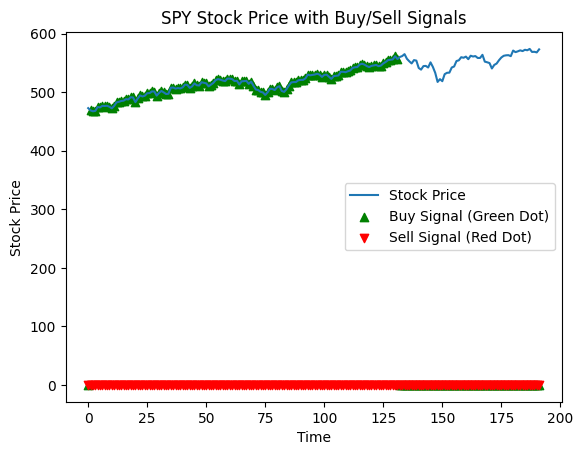

In [109]:
# Plot results with buy/sell signals
plt.plot(test_data['Close'].values, label="Stock Price")
plt.scatter(range(len(test_data['Close'])), buy_signal, color='green', label="Buy Signal (Green Dot)", marker="^", alpha=1)
plt.scatter(range(len(test_data['Close'])), sell_signal, color='red', label="Sell Signal (Red Dot)", marker="v", alpha=1)
plt.title(f"{stock} Stock Price with Buy/Sell Signals")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [111]:
filtered_data = stock_data.dropna(subset=['Label'])

In [112]:
filtered_data

,Open,High,Low,Close,Adj Close,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg,Label
Date,,,,,,,,,,,,
2005-01-18,118.050003,119.620003,117.949997,119.470001,82.270622,57391700,0.910179,-0.165001,-0.208000,-0.151152,0.000000,1.0
2005-01-24,117.089996,117.339996,116.370003,116.550003,80.259796,58441900,0.185569,-0.720001,-0.489000,-0.132849,0.000000,0.0
2005-02-16,120.930000,121.459999,120.669998,121.209999,83.468834,55523000,0.683545,0.180000,0.458000,0.179333,0.225158,1.0
2005-02-22,119.900002,120.470001,118.580002,118.599998,81.671501,80697600,0.010580,-0.410000,-0.148000,0.100606,0.230489,0.0
2005-03-07,122.660004,123.250000,122.400002,122.790001,84.556892,43442400,0.458824,0.780003,0.419001,0.304061,0.077436,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,301.529999,302.630005,300.709991,301.079987,277.426697,76560500,0.192704,0.470001,-0.054999,0.420182,0.799895,1.0
2019-10-03,287.809998,290.450012,284.820007,290.420013,268.839905,85278800,0.994672,-4.354996,-2.004001,-0.979939,-0.336211,0.0
2019-11-27,314.609985,315.480011,314.369995,315.480011,292.037872,44444600,1.000000,1.559998,0.972000,0.369696,0.450360,1.0


In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(filtered_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']])

In [126]:
filtered_data

,Open,High,Low,Close,Adj Close,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg,Label
Date,,,,,,,,,,,,
2005-01-18,118.050003,119.620003,117.949997,119.470001,82.270622,57391700,0.910179,-0.165001,-0.208000,-0.151152,0.000000,1.0
2005-01-24,117.089996,117.339996,116.370003,116.550003,80.259796,58441900,0.185569,-0.720001,-0.489000,-0.132849,0.000000,0.0
2005-02-16,120.930000,121.459999,120.669998,121.209999,83.468834,55523000,0.683545,0.180000,0.458000,0.179333,0.225158,1.0
2005-02-22,119.900002,120.470001,118.580002,118.599998,81.671501,80697600,0.010580,-0.410000,-0.148000,0.100606,0.230489,0.0
2005-03-07,122.660004,123.250000,122.400002,122.790001,84.556892,43442400,0.458824,0.780003,0.419001,0.304061,0.077436,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,301.529999,302.630005,300.709991,301.079987,277.426697,76560500,0.192704,0.470001,-0.054999,0.420182,0.799895,1.0
2019-10-03,287.809998,290.450012,284.820007,290.420013,268.839905,85278800,0.994672,-4.354996,-2.004001,-0.979939,-0.336211,0.0
2019-11-27,314.609985,315.480011,314.369995,315.480011,292.037872,44444600,1.000000,1.559998,0.972000,0.369696,0.450360,1.0


In [128]:
filtered_data = stock_data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)

In [129]:
filtered_data

,Volume,Normalized_Price,3_day_reg,5_day_reg,10_day_reg,20_day_reg,Label
Date,,,,,,,
2005-01-03,55748000,0.215055,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-04,69167600,0.185714,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-05,65667300,0.008002,0.000000,0.000000,0.000000,0.000000,NaN
2005-01-06,47814700,0.393257,-1.145000,0.000000,0.000000,0.000000,NaN
2005-01-07,55847700,0.281821,-0.110001,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...
2019-12-24,20270000,0.532290,0.160004,0.444000,0.843090,0.491572,NaN
2019-12-26,30911200,0.992359,0.250000,0.360004,0.673878,0.532925,NaN
2019-12-27,42528800,0.381573,0.860001,0.458002,0.563940,0.598098,1.0


In [130]:
scaled_data = scaler.fit_transform(filtered_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']])

In [131]:
scaled_data

array([[0.21505451, 0.04730085, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       [0.18571413, 0.06298242, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       [0.00800171, 0.05889212, 0.56245988, 0.63030633, 0.65130797,
        0.60118507],
       ...,
       [0.38157287, 0.03185346, 0.6172719 , 0.68133715, 0.75946411,
        0.78282005],
       [0.20784117, 0.04026742, 0.61440297, 0.69693528, 0.75238526,
        0.80493214],
       [0.86362726, 0.04885421, 0.50318596, 0.64534749, 0.71579458,
        0.81034136]])

In [132]:
filtered_data = stock_data.dropna(subset=['Label'])

In [138]:
# Load Data
stock = 'SPY'
start = dt.datetime(2005, 1, 1)
end = dt.datetime(2020, 1, 1)
stock_data = yf.download(stock, start, end)

# Calculate normalized price (close relative to the day's range)
stock_data['Normalized_Price'] = (stock_data['Close'] - stock_data['Low']) / (stock_data['High'] - stock_data['Low'])

# Calculate regression coefficients
def calculate_regression(stock_data, days):
    reg_coef = []
    for i in range(len(stock_data)):
        if i >= days:
            X = np.arange(days).reshape(-1, 1)
            y = stock_data['Close'].values[i-days:i]
            model = LinearRegression()
            model.fit(X, y)
            reg_coef.append(model.coef_[0])
        else:
            reg_coef.append(0)
    return reg_coef

# Adding regression coefficients for 3, 5, 10, 20 days
stock_data['3_day_reg'] = calculate_regression(stock_data, 3)
stock_data['5_day_reg'] = calculate_regression(stock_data, 5)
stock_data['10_day_reg'] = calculate_regression(stock_data, 10)
stock_data['20_day_reg'] = calculate_regression(stock_data, 20)

# Determine local max/min
max_indices = argrelextrema(stock_data['Close'].values, np.greater, order=5)[0]
min_indices = argrelextrema(stock_data['Close'].values, np.less, order=5)[0]

labels = np.full(len(stock_data), np.NaN)
labels[max_indices] = 1  # Local maximum
labels[min_indices] = 0   # Local minimum

# Filter the NaN values in the labels
stock_data['Label'] = labels
stock_data.dropna(subset=['Label'], inplace=True)

# Prepare Data (Normalize features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']])

# Prepare data for training
prediction_days = 60
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, :])
    y_train.append(stock_data['Label'].values[x])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train for LSTM (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

# Build the LSTM binary classification model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Test model on new data
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime(2021, 1, 1)
test_data = yf.download(stock, test_start, test_end)

# Prepare test data with the same features
test_data['Normalized_Price'] = (test_data['Close'] - test_data['Low']) / (test_data['High'] - test_data['Low'])
test_data['3_day_reg'] = calculate_regression(test_data, 3)
test_data['5_day_reg'] = calculate_regression(test_data, 5)
test_data['10_day_reg'] = calculate_regression(test_data, 10)
test_data['20_day_reg'] = calculate_regression(test_data, 20)

# Scale the test data
model_inputs = test_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']].values
model_inputs = scaler.transform(model_inputs)

# Prepare x_test with the required shape for LSTM
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, :])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Predict local minima/maxima
predicted_extrema = model.predict(x_test)
predicted_extrema = (predicted_extrema > 0.5).astype(int)  # Threshold at 0.5

[*********************100%***********************]  1 of 1 completed


Epoch 1/25


C:\Users\shahv\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5420 - loss: 0.6957
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4862 - loss: 0.6922
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5362 - loss: 0.6936
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5237 - loss: 0.6934
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4762 - loss: 0.6938
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5498 - loss: 0.6926
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5359 - loss: 0.6912
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4987 - loss: 0.6934
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5273 - loss: 0.6924
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5364 - loss: 0.6929
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5338 - loss: 0.6923
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4999 - l

[*********************100%***********************]  1 of 1 completed
C:\Users\shahv\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


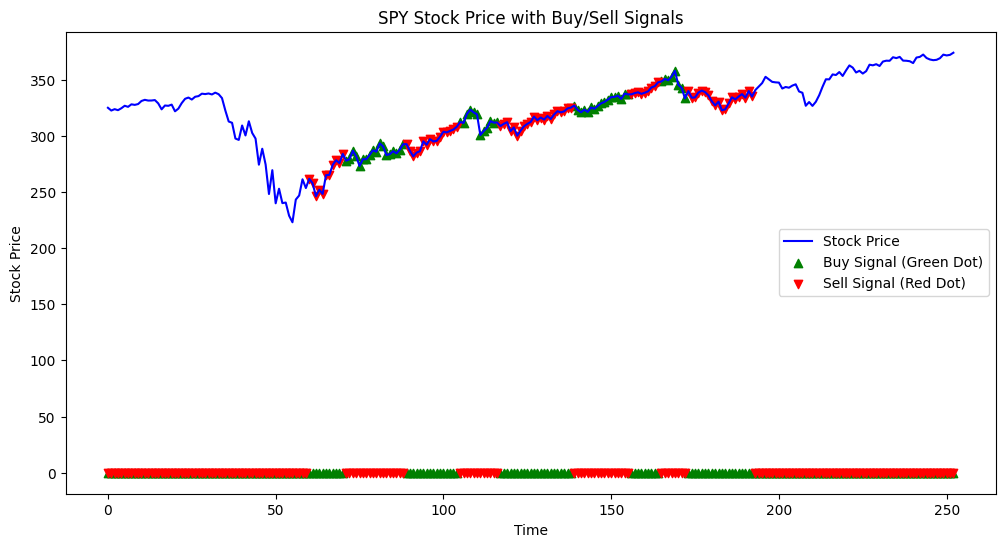

In [150]:
# Predict local minima/maxima
predicted_extrema = model.predict(x_test)
predicted_extrema = (predicted_extrema > 0.478).astype(int)  # Threshold at 0.5

# Buy/sell logic based on predicted extrema
buy_signal = np.zeros(len(test_data))
sell_signal = np.zeros(len(test_data))

for i in range(prediction_days, len(predicted_extrema)):
    if predicted_extrema[i - prediction_days] == 0:  # Buy signal
        buy_signal[i] = test_data['Close'].values[i]
    elif predicted_extrema[i - prediction_days] == 1:  # Sell signal
        sell_signal[i] = test_data['Close'].values[i]

# Plot results with buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'].values, label="Stock Price", color='blue')
plt.scatter(range(len(test_data['Close'])), buy_signal, color='green', label="Buy Signal (Green Dot)", marker="^", alpha=1)
plt.scatter(range(len(test_data['Close'])), sell_signal, color='red', label="Sell Signal (Red Dot)", marker="v", alpha=1)
plt.title(f"{stock} Stock Price with Buy/Sell Signals")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


IndexError: index 458 is out of bounds for axis 0 with size 452

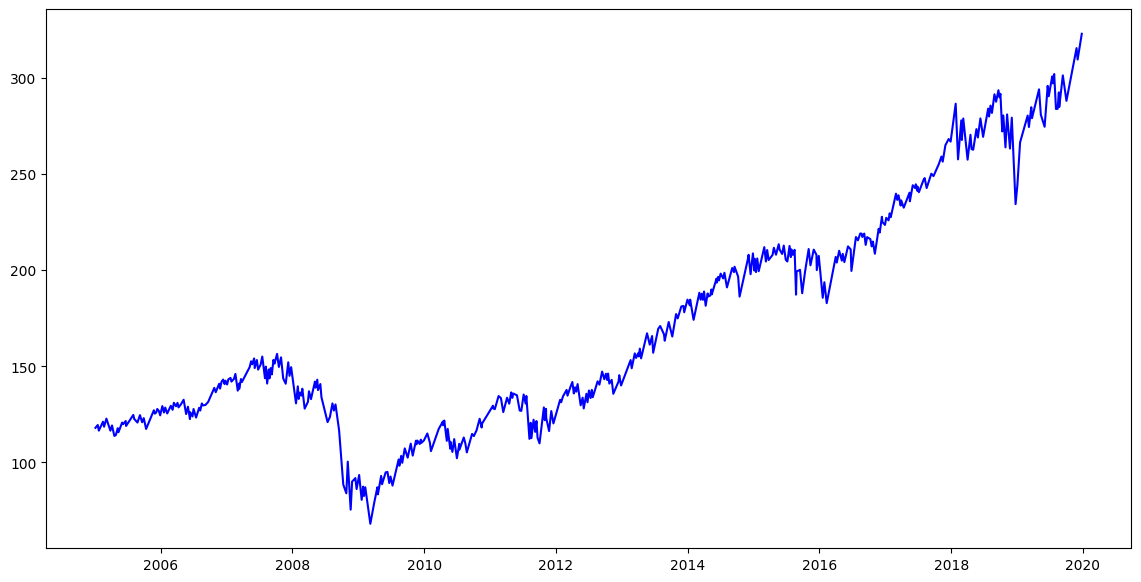

In [155]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')

plt.scatter(range(len(stock_data['Close'])), buy_signal, color='green', label="Buy Signal (Green Dot)", marker="^", alpha=1)
plt.scatter(range(len(stock_data['Close'])), sell_signal, color='red', label="Sell Signal (Red Dot)", marker="v", alpha=1)
plt.title(f"{stock} Stock Price with Buy/Sell Signals")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [157]:
stock_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


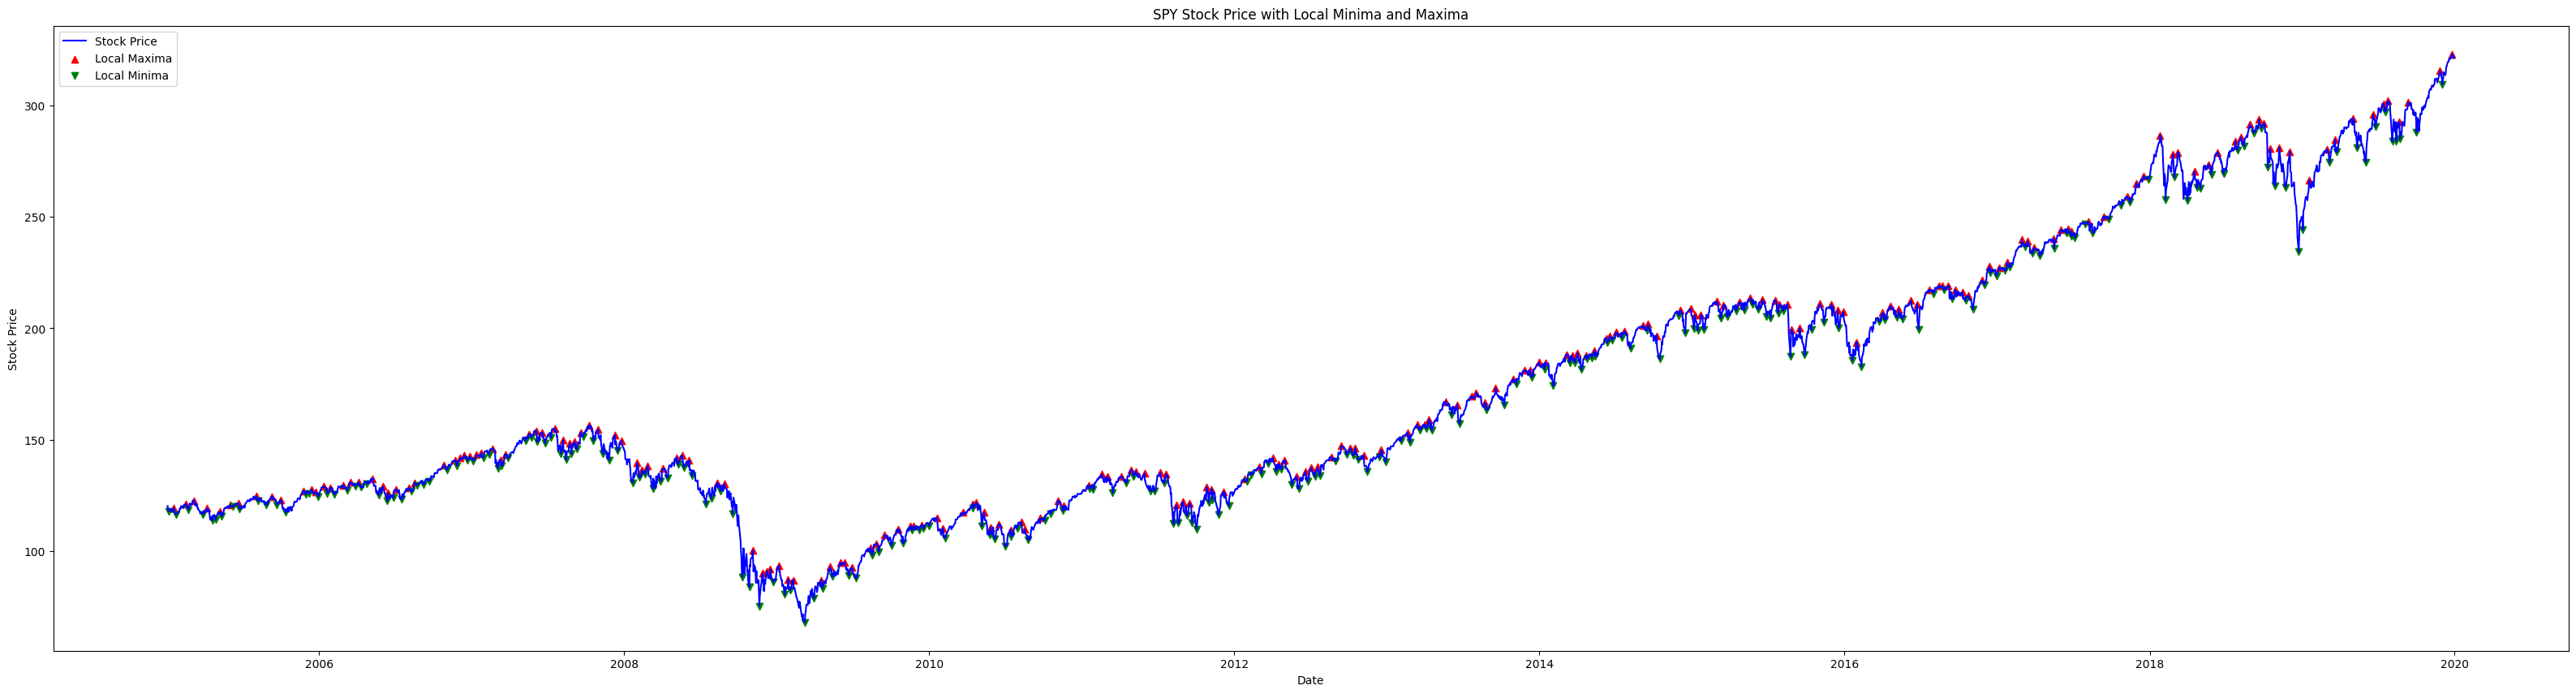

In [161]:
# Plot the stock data with local minima (green) and local maxima (red)
plt.figure(figsize=(40, 10))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')

# Plot local maxima and minima
plt.scatter(stock_data.index[max_indices], stock_data['Close'].iloc[max_indices], color='red', label='Local Maxima', marker='^', alpha=1)
plt.scatter(stock_data.index[min_indices], stock_data['Close'].iloc[min_indices], color='green', label='Local Minima', marker='v', alpha=1)

# Add titles and labels
plt.title(f'{stock} Stock Price with Local Minima and Maxima')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [166]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import argrelextrema

In [7]:
class LRTrading:

    def __init__(self, stock, start, end):
        self.stock = stock
        self.start = start
        self.end = end
        self.scaler = MinMaxScaler()
        self.model = LogisticRegression()
        self.main_df = self.fetch_data()
        self.train_model()

    # Fetch stock data using yfinance
    def fetch_data(self):
        stock_data = yf.download(self.stock, self.start, self.end)
        stock_data['Normalized_Price'] = (stock_data['Close'] - stock_data['Low']) / (stock_data['High'] - stock_data['Low'])
        stock_data['Volume'] = stock_data['Volume']

        # Calculate rolling regression coefficients
        stock_data['3_day_reg'] = self.calculate_regression(stock_data, 3)
        stock_data['5_day_reg'] = self.calculate_regression(stock_data, 5)
        stock_data['10_day_reg'] = self.calculate_regression(stock_data, 10)
        stock_data['20_day_reg'] = self.calculate_regression(stock_data, 20)

        # Determine local maxima and minima
        max_indices = argrelextrema(stock_data['Close'].values, np.greater, order=5)[0]
        min_indices = argrelextrema(stock_data['Close'].values, np.less, order=5)[0]

        labels = np.full(len(stock_data), np.NaN)
        labels[max_indices] = 1  # Local maximum (sell signal)
        labels[min_indices] = 0   # Local minimum (buy signal)

        stock_data['Label'] = labels
        stock_data.dropna(subset=['Label'], inplace=True)

        return stock_data

    # Function to calculate linear regression coefficients over a rolling window
    def calculate_regression(self, stock_data, days):
        reg_coef = []
        for i in range(len(stock_data)):
            if i >= days:
                X = np.arange(days).reshape(-1, 1)
                y = stock_data['Close'].values[i-days:i]
                model = LinearRegression()
                model.fit(X, y)
                reg_coef.append(model.coef_[0])
            else:
                reg_coef.append(0)
        return reg_coef

    # Train the logistic regression model
    def train_model(self):
        x = self.main_df[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']]
        y = self.main_df['Label'].values

        x_scaled = self.scaler.fit_transform(x)
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

        self.model.fit(self.train_x, self.train_y)

        # Evaluate the model
        self.evaluate_model()

    # Evaluate the model using confusion matrix
    def evaluate_model(self):
        predictions = self.model.predict(self.test_x)
        cm = confusion_matrix(self.test_y, predictions)
        cmd = ConfusionMatrixDisplay(cm)
        cmd.plot()
        plt.title(f"Confusion Matrix for {self.stock}")
        plt.show()
        print(f'Model accuracy: {self.model.score(self.test_x, self.test_y)}')

    # Test the model on new data and generate buy/sell signals
    def test_model(self, test_start, test_end):
        test_data = yf.download(self.stock, test_start, test_end)
        test_data['Normalized_Price'] = (test_data['Close'] - test_data['Low']) / (test_data['High'] - test_data['Low'])
        test_data['3_day_reg'] = self.calculate_regression(test_data, 3)
        test_data['5_day_reg'] = self.calculate_regression(test_data, 5)
        test_data['10_day_reg'] = self.calculate_regression(test_data, 10)
        test_data['20_day_reg'] = self.calculate_regression(test_data, 20)

        model_inputs = test_data[['Normalized_Price', 'Volume', '3_day_reg', '5_day_reg', '10_day_reg', '20_day_reg']].values
        model_inputs_scaled = self.scaler.transform(model_inputs)

        predicted_labels = self.model.predict(model_inputs_scaled)

        buy_signal, sell_signal = [None] * len(test_data), [None] * len(test_data)
        for i in range(len(predicted_labels)):
            if predicted_labels[i] == 0:
                buy_signal[i] = test_data['Close'].values[i]
            elif predicted_labels[i] == 1:
                sell_signal[i] = test_data['Close'].values[i]

        return test_data, buy_signal, sell_signal

    # Plot buy/sell signals
    def plot_signals(self, test_data, buy_signal, sell_signal):
        plt.figure(figsize=(12, 6))
        plt.plot(test_data['Close'].values, label="Stock Price", color='blue')
        plt.scatter(range(len(test_data['Close'])), buy_signal, color='green', label="Buy Signal", marker="^", alpha=1)
        plt.scatter(range(len(test_data['Close'])), sell_signal, color='red', label="Sell Signal", marker="v", alpha=1)
        plt.title(f"{self.stock} Stock Price with Buy/Sell Signals")
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

[*********************100%***********************]  1 of 1 completed


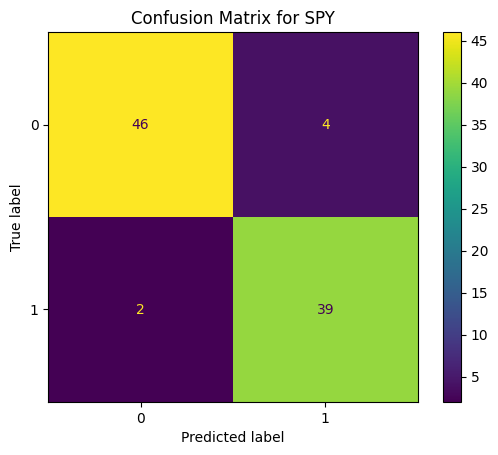

[*********************100%***********************]  1 of 1 completed

Model accuracy: 0.9340659340659341



C:\Users\shahv\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


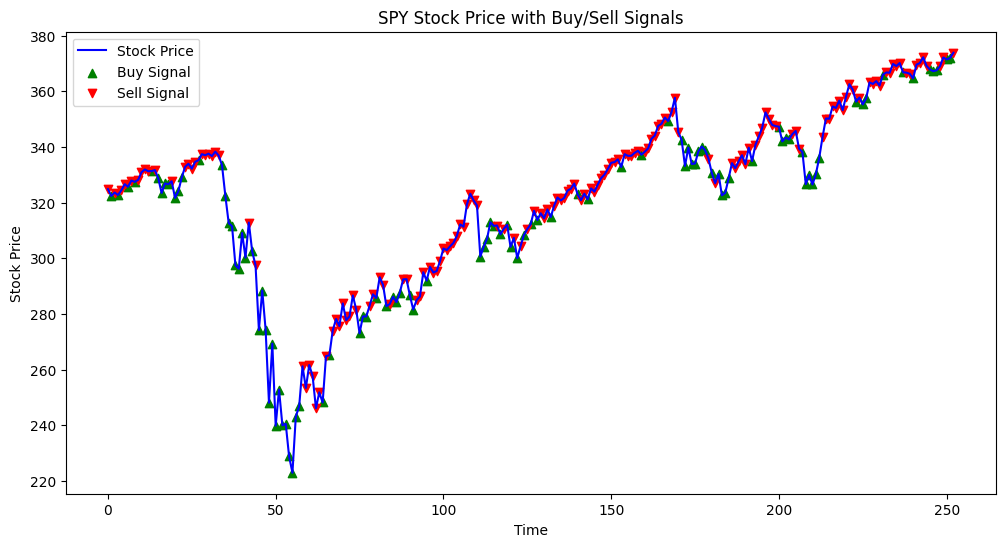

In [167]:
lr_model = LRTrading(stock='SPY', start='2005-01-01', end='2020-01-01')
test_data, buy_signal, sell_signal = lr_model.test_model(test_start='2020-01-01', test_end='2021-01-01')
lr_model.plot_signals(test_data, buy_signal, sell_signal)